In [1]:
!pip install calmap

In [2]:
'''Import basic modules.'''
import pandas as pd
import numpy as np


'''Customize visualization
Seaborn and matplotlib visualization.'''
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import folium 
import calmap
from IPython.core.display import HTML
import urllib.request
from PIL import Image
from wordcloud import WordCloud ,STOPWORDS


'''Plotly visualization .'''
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

import warnings
warnings.filterwarnings('ignore')

# <font face="Arial Black">COVID-19 India: Analysis, Visualization, And Comparison</font>
#### Last Update - 25/04/2020
<b face="Arial">#StayHome,SaveLives</b>
![](https://thespinoff.co.nz/wp-content/uploads/2020/03/Covid-19-Handshake-Alternatives-v3.gif)
Image Source: greenpeace.org

**This Notebook Inspired by Following Kernels :**
* [Coronavirus: An Exploratory Study W/ Detail Report](https://www.kaggle.com/vikassingh1996/coronavirus-an-exploratory-study-w-detail-report) ~ @vikassingh1996
* [Tracking-india-s-coronavirus-spread-wip](https://www.kaggle.com/parulpandey/tracking-india-s-coronavirus-spread-wip) ~@parulpandey
* [COVID-19 Case Study - Analysis, Viz & Comparisons](https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons) ~@tarunkr
* [India's fight against Covid-19: April 2020](https://www.kaggle.com/rohanrao/india-s-fight-against-covid-19-april-2020) ~@rohanrao

# Introduction
<hr></hr>

## First case in India 
On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.The transmission escalated in the month of March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country. Confirmed cases crossed 100 on 15 March, 1,000 on 28 March and 2,000 on 2 April and 3,000 on 4 April. The death toll crossed 50 on 1 April.

![](https://imgur.com/6wtDrrQ.png)

In [3]:
# Data cleaning
df = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
data = df.copy()
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno', 'Time'],axis=1,inplace=True)

# collect present data
from datetime import date
data_apr = data[data['Date'] > pd.Timestamp(date(2020,4,25))]

# prepaing data state wise
state_cases = data_apr.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)

#  Present Condition in India
<hr></hr>

In [4]:
bold("** Present Condition in India: Confirmed cases, Deaths, Recovered of 2019-nCoV**")
print('Total Confirmed Cases: ',state_cases['Confirmed'].sum())
print('Total Deaths: ',state_cases['Deaths'].sum())
print('Total Cured Cases: ',state_cases['Cured'].sum())
print('Death Rate (per 100): ',np.round(100*state_cases['Deaths'].sum()/state_cases['Confirmed'].sum(),2))

** Present Condition in India: Confirmed cases, Deaths, Recovered of 2019-nCoV**

Total Confirmed Cases:  8447
Total Deaths:  273
Total Cured Cases:  765
Death Rate (per 100):  3.23


***Death Rate = number of deaths / number of cases x 100***

In [5]:
bold("** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**")
state_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Death Rate (per 100)"])

** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100)
18,Maharashtra,1761,127,208,1842,7.21
7,Delhi,1069,19,25,1075,1.78
25,Tamil Nadu,969,10,44,1003,1.03
24,Rajasthan,700,3,21,718,0.43
17,Madhya Pradesh,564,36,0,528,6.38
26,Telengana,504,9,43,538,1.79
28,Uttar Pradesh,452,5,45,492,1.11
9,Gujarat,432,22,44,454,5.09
1,Andhra Pradesh,381,6,11,386,1.57
15,Kerala,374,2,142,514,0.53


In [6]:
fig = px.bar(state_cases.sort_values('Confirmed', ascending= False).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="State/UnionTerritory", 
             title='Total Confirmed Cases', 
             text='Confirmed', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#FFA500', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [7]:
fig = px.bar(state_cases.sort_values('Deaths', ascending= False).sort_values('Deaths', ascending=True), 
             x="Deaths", y="State/UnionTerritory", 
             title='Total Deaths Cases', 
             text='Deaths', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#FF0000', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [8]:
fig = px.bar(state_cases.sort_values('Cured', ascending= False).sort_values('Cured', ascending=True), 
             x="Cured", y="State/UnionTerritory", 
             title='Total Cured Cases', 
             text='Cured', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#008000', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [9]:
fig = px.bar(state_cases.sort_values('Active', ascending= False).sort_values('Active', ascending=True), 
             x="Active", y="State/UnionTerritory", 
             title='Total Active Cases', 
             text='Active', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#0000FF', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [10]:
fig = px.bar(state_cases.sort_values('Death Rate (per 100)', ascending= False).sort_values('Death Rate (per 100)', ascending=True), 
             x="Death Rate (per 100)", y="State/UnionTerritory", 
             title='Death Rate (per 100)', 
             text='Death Rate (per 100)', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#800080', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [11]:
df_individual = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv', usecols = ['detected_city', 'notes'])
detected_city = df_individual['detected_city'].value_counts().reset_index()
detected_city.rename(columns={"index":"Cities",
                            "detected_city": "Counts"}, inplace=True)
fig = px.bar(detected_city.sort_values('Counts', ascending=True).sort_values('Counts', ascending=False).head(15), 
             y="Counts", x="Cities", color= "Cities",
             title='Hotspot Cities Detected With Most cases', 
             orientation='v',
             color_discrete_sequence = px.colors.cyclical.IceFire,
             width=700, height=600)
fig.update_traces(opacity=0.8)

fig.update_layout(template = 'plotly_white')
fig.show()

**HIGHLIGHTS**
* Prime Minister Narendra Modi chaired a joint meeting of the Empowered Groups (04 April) constituted for planning and ensuring implementation of COVID-19 response activities in the country.
* ICMR to collaborate in the global WHO Solidarity Trial – an international randomized trial of treatment of COVID-19 in hospitalized patients.
* MoHFW issued an order for insurance cover for all health workers for a period of 90 days through 'Pradhan Mantri Garib Kalyan Package: Insurance Scheme for Health Workers Fighting COVID-I9'.
* Government of India launched a mobile app ArogyaSetu (02 April) through a public-private partnership to enable people to assess their risk of COVID infection (in line with privacy and data security parameters).
* WHO Country office for India is working closely with Ministry of Health and Family Welfare (MoHFW) to strengthen COVID-19 Special Surveillance System (S3) through the Integrated Health Information Platform (IHIP).

**INDIA SITUATION** 
* As of 5 April 2020 (18:00 PM), according to MoHFW, a total of 3577 COVID19 cases, (including 65 foreign nationals) have been reported in 29 states/union territories. These include 274 who have been cured/discharged, 1 who has migrated and 83 deaths. 

<p>**source** [India Situation Report WHO](https://www.who.int/india/emergencies/india-situation-report)</p>

### Map Visualization: Confirmed Cases

In [12]:
india_map = pd.DataFrame({
    'States':list(state_cases['State/UnionTerritory']),
    'lat':[11.667026,14.750429,27.100399,26.749981,25.785414,30.719997,22.090420,28.669993,15.491997,22.258700,28.450006,31.100025,33.450000,
            23.800393,12.570381,8.900373,34.100000,21.300391,19.250232,24.799971,23.710399,19.820430,11.934994,31.519974,26.449999,
            12.920386,18.112400,23.9408, 27.599981,30.320409,22.580390],
    'long':[92.735983,78.570026,93.616601,94.216667,87.479973,76.780006,82.159987,77.230004,
            73.818001,71.192400,77.019991,77.166597,76.240000,86.419986,76.919997,76.569993,
            77.340000,76.130019,73.160175,93.950017,92.720015,85.900017,79.830000,75.980003,
            74.639981,79.150042,79.019300,91.9882, 78.050006,78.050006,88.329947],
    'Confirmed':list(state_cases['Confirmed']),
    'Recovered':list(state_cases['Cured']),
    'Deaths':list(state_cases['Deaths'])
})

In [13]:
_map = folium.Map(location=[23,80], tiles="Stamen Toner", zoom_start=4)

for lat, lon, value, name in zip(india_map['lat'], india_map['long'], india_map['Confirmed'], india_map['States']):
    folium.CircleMarker([lat, lon],
                        radius= (int((np.log(value+1.00001))))*3,
                        popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='#ff6600',
                        
                        fill_color='#ff8533',
                        fill_opacity=0.8 ).add_to(_map)
_map

### Projection Map

In [14]:
HTML('''<div class="flourish-embed flourish-map" data-src="visualisation/2086857" data-url="https://flo.uri.sh/visualisation/2086857/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# India is currently in Stage 2 of the pandemic, according to the Indian Council of Medical Research.
<hr></hr>


The second stage of an outbreak is when there are cases of local transmission in the country, the report explains. This means that the person from whom the infection spread to another person is from the country itself. In this stage, the trajectory of the virus can be identified from the source to all the infected individuals. [Source](https://www.financialexpress.com/lifestyle/health/coronavirus-outbreak-what-are-the-different-stages-of-a-pandemic/1906629/)

In [15]:
# data preparation
spread = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv",)
spread['ObservationDate'] = spread['ObservationDate'].apply(pd.to_datetime)
spread = spread[spread['ObservationDate'] > pd.Timestamp(date(2020,1,20))]
india_spread = spread[spread['Country/Region']=='India'].reset_index(drop=True)
india_spread['Active'] = india_spread['Confirmed'] - (india_spread['Deaths'] + india_spread['Recovered'])

# Daily cases
india_spread['Confirmed_diff'] = india_spread['Confirmed'].diff()
india_spread['Death_diff'] = india_spread['Deaths'].diff()
india_spread['Recovered_diff'] = india_spread['Recovered'].diff()

# growth rate of confirmed cases
india_spread['Confirmed_gr'] = np.round(india_spread['Confirmed_diff'].pct_change(), 2)

In [16]:
#ploting spread over time
date_india_spread = india_spread.groupby('ObservationDate')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

trace1 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['Confirmed'],
                name="Confirmed",
                mode='lines+markers',
                line_color='orange')
trace2 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['Deaths'],
                name="Deaths",
                mode='lines+markers',
                line_color='red')

trace3 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['Recovered'],
                name="Recovered",
                mode='lines+markers',
                line_color='green')
trace4 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['Active'],
                name="Active",
                mode='lines+markers',
                line_color='blue')

layout = go.Layout(template="ggplot2", width=700, height=500, title_text = '<b>Spread of the Coronavirus In India Over Time </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig = go.Figure(data = [trace1,trace2,trace3, trace4], layout = layout)
fig.show()



# plot daily cases
colors = ['#FFA500']*85
colors[-5] = 'crimson'
fig = px.bar(india_spread, 
             x="ObservationDate", y="Confirmed_diff", 
             title='<b>New Confirm Cases Per Day In India</b>', 
             orientation='v', 
             width=700, height=600)
fig.update_traces(marker_color=colors, opacity=0.8)

fig.add_annotation( # add a text callout with arrow
    text="First Lockdown", x='2020-03-24', y=1400, arrowhead=1, showarrow=True
)

fig.add_annotation( # add a text callout with arrow
    text="Extended Lockdown", x='2020-04-14', y=1400, arrowhead=1, showarrow=True
)
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2020-03-24',
            y0=0,
            x1='2020-03-24',
            y1=1800,
            line=dict(
                color="RoyalBlue",
                width=1,
                dash="dashdot"
            )))

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2020-04-14',
            y0=0,
            x1='2020-04-14',
            y1=1800,
            line=dict(
                color="RoyalBlue",
                width=1,
                dash="dashdot"
            )))


fig.update_layout(template = 'plotly_white',font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()


# plot of growth rate of confirmed cases
fig1 = px.scatter(india_spread, 
                 x='ObservationDate', 
                  y="Confirmed_gr", 
                  text='Confirmed_gr',
                  range_x=['2020-03-05','2020-04-22'])
fig1.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  marker_color='#4169e1',
                  mode='text+lines+markers',textposition='top center', )

fig1.update_layout(template = 'plotly_white', width=700, height=700, title_text = '<b>Growth percent in number of total<br>COVID-19 cases in India on each day<br>compared to the previous day</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig1.show()

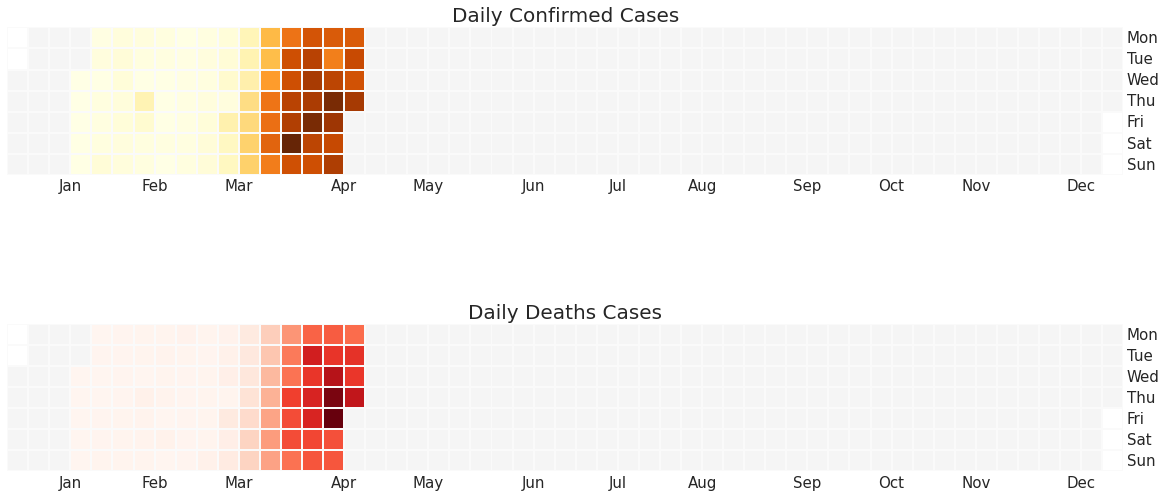

In [17]:
f = plt.figure(figsize=(20,10))
f.add_subplot(2,1,1)
calmap.yearplot(spread.groupby('ObservationDate')['Confirmed'].sum().diff(), fillcolor='whitesmoke', cmap='YlOrBr', linewidth=1,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(2,1,2)
calmap.yearplot(spread.groupby('ObservationDate')['Deaths'].sum().diff(), fillcolor='whitesmoke', cmap='Reds', linewidth=1,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

#### GOVT DENIES INDIA IN COMMUNITY TRANSMISSION STAGE
The Union Health Ministry in its daily briefing said the Covid-19 is still in local transmission stage in India and it took 12 days for cases of infection to rise from 100 to 1,000 at a rate of increase slower than some of the developed countries. 
[source](https://www.indiatoday.in/india/story/covid-19-india-records-biggest-single-day-spike-as-cases-reach-1300-nizamuddin-gathering-leaves-6-dead-1661561-2020-03-31)

# Age Profile Analysis: Going Against Trend, Most Patients In India Are Millennials
<hr></hr>

In [18]:
age = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
colors = ['gold', 'darkorange', 'crimson','mediumturquoise', 'sandybrown', 'grey',  'lightgreen','navy','deeppink','purple']
trace1 = go.Pie(
                labels=age.AgeGroup,
                values=age.TotalCases,
                hoverinfo='label+percent', 
                textfont_size=12,
                marker=dict(colors=colors, 
                            line=dict(color='#000000', width=2)))
layout = go.Layout(width=700, height=500,title_text = '<b>Number People Affected By Covid-19 in India <br> Distribution By Age Group</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

colors = ['lightslategray']*10 
colors[2] = 'crimson'
trace2 = go.Bar(
            x=age.AgeGroup, 
            y=age.TotalCases,
            text=age.TotalCases,
            textposition='auto',
            marker_color=colors)
layout = go.Layout(template="ggplot2",width=700, height=500, )

fig = go.Figure(data = [trace2], layout = layout)
fig.show()

The maximum number of people affected by covid-19 in India are in the age group of 21-40, While the elderly are said to be the most vulnerable to the disease, people above 60 years accounted for only 17% of total cases in the country. The 9% of positive cases are in between 0- 20 years, 42% cases are in the age group of 21-40, 33% in 41-60 and 17% in the people above 60 years of age.

# Why India Has Relatively Lesser Number of COVID-19 Cases Against It's Population.
<hr></hr>
According to Worldometer - India has one COVID-19 confirmed case and 0.03 deaths for every 1 million population while the global average is 113.2 cases and 5.7 deaths.

## 1. Due To Lockdown
India is imposing one of the world's largest lockdown, asking people to stay home and practice social distancing. The aim of the lockdown is to cut the possible human to human transmission and reduce the number of cases. These are too early days to judge the impact of the lockdown, but could still playout by helping in reducing number of cases.

#### Let's compare the Indian state population to its no. of confirm cases

In [19]:
pop = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
pop.rename(columns={'State / Union Territory': 'State/UnionTerritory'}, inplace=True)

pop_case = state_cases.merge(pop[['State/UnionTerritory', 'Population']], on='State/UnionTerritory')
pop_case['MortalityRate (per million)'] = np.round(1000000*pop_case["Deaths"]/pop_case["Population"],2)

In [20]:
bold("**Mortality Rate of States**")
pop_case[['State/UnionTerritory','MortalityRate (per million)']].sort_values('MortalityRate (per million)', ascending= False).style.background_gradient(cmap='Purples',subset=["MortalityRate (per million)"])

**Mortality Rate of States**

,State/UnionTerritory,MortalityRate (per million)
18,Maharashtra,1.13
7,Delhi,1.13
17,Madhya Pradesh,0.5
23,Punjab,0.4
9,Gujarat,0.36
12,Jammu and Kashmir,0.33
26,Telengana,0.26
11,Himachal Pradesh,0.15
25,Tamil Nadu,0.14
1,Andhra Pradesh,0.12


***MortalityRate (per million) = Total nuber of Deaths cases / Total population of states x 1, 000,000***

In [21]:
from bokeh.layouts import column, row
from bokeh.plotting import ColumnDataSource, figure, output_notebook, show

output_notebook()

source_1 = ColumnDataSource(data = dict(
    state = pop_case['State/UnionTerritory'].values,
    population = pop_case['Population'].values / 1000000,
    cases = pop_case['Confirmed'].values,
    deaths = pop_case['Deaths'].values,
    death_rate = pop_case['MortalityRate (per million)'].values
))

tooltips_1 = [
    ("State", "@state"),
    ("Population", "@population{0.00} M"),
    ("Confirmed", "@cases")
]

tooltips_2 = [
    ("State", "@state"),
    ("Population", "@population{0.00} M"),
    ("Deaths", "@deaths")
]

tooltips_3 = [
    ("State", "@state"),
    ("Population", "@population{0.00} M"),
    ("Mortality Rate", "@death_rate{0.000}")
]

v1 = figure(plot_width = 250, plot_height = 250, tooltips = tooltips_1, title = "Population vs Confirmed by State")
v1.circle("population", "cases", source = source_1, size = 13, color = "orange", alpha = 0.41)
v1.xaxis.axis_label = "Population"
v1.yaxis.axis_label = "Cases"

v2 = figure(plot_width = 250, plot_height = 250, tooltips = tooltips_2, title = "Population vs Deaths by State")
v2.circle("population", "deaths", source = source_1, size = 13, color = "red", alpha = 0.41)
v2.xaxis.axis_label = "Population"
v2.yaxis.axis_label = "Deaths"

v3 = figure(plot_width = 250, plot_height = 250, tooltips = tooltips_3, title = "Population vs MortalityRate by State")
v3.circle("population", "death_rate", source = source_1, size = 13, color = "purple", alpha = 0.41)
v3.xaxis.axis_label = "Population"
v3.yaxis.axis_label = "Death Rate"

show(row(v1, v2, v3))

Loading BokehJS ...

Every circle represent a state's position based on its population and a Covid-19 metric (cases, deaths and mortality-rate for the three plots).

Nothing very clear to take away from this. Instead we can look at the relative ranks of the population of states against the respective ranks in Covid-19 metrics.


## 2. Not testing enough
India has only tested about 47,951 persons. Capacity utilisation across 126 Indian Council of Medical Research (ICMR) laboratories so far stands at 38 percent. We also have narrow testing, i.e. we test only those with travel history to affected areas or those who came into contact with a COVID-19 positive case.

ICMR expanded the criteria on March 20 to include symptomatic healthcare workers and family members who are taking care of COVID-19 positive patients. The narrow criteria helps in reducing the burden on the public healthcare system, but clearly India is not testing enough. [source](https://www.moneycontrol.com/news/trends/health-trends/explainer-why-india-has-less-number-of-covid-19-cases-5097641.html)

#### Dataset:
This dataset is provided by https://api.rootnet.in/

#### Let's analysis of Tests done in India and Comparission with South Korea

In [22]:
import requests
indiatest = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data'])
indiatest.drop(['totalIndividualsTested','source'], axis=1, inplace=True)
indiatest['day'] = indiatest['day'].apply(pd.to_datetime)

indiatest["totalSamplesTested_diff"] = indiatest["totalSamplesTested"].diff()
indiatest["totalPositiveCases_diff"] = indiatest["totalPositiveCases"].diff()
indiatest["p2t_ratio"]= np.round(100*indiatest["totalPositiveCases_diff"]/indiatest["totalSamplesTested_diff"],2)

In [23]:
bold("** Present Sample Tested for COVID-19 in India**")
print('Total Sample Tested: ',indiatest['totalSamplesTested'].max())
print('Total Positive to Test Ratio:',np.round(100*indiatest["totalPositiveCases"].max()/indiatest["totalSamplesTested"].max(),2))
print('Tests Per Million Peoples:', np.round(100000*indiatest["totalSamplesTested"].max()/pop_case["Population"].sum(),2))

** Present Sample Tested for COVID-19 in India**

Total Sample Tested:  541789.0
Total Positive to Test Ratio: 4.34
Tests Per Million Peoples: 44.99


In [24]:
fig1 = go.Figure(data=[go.Bar(
            x=indiatest.day, 
            y=indiatest.totalSamplesTested_diff,
            name='Test Negetive Case',
            marker_color='#000000'),
            
            go.Bar(
            x=indiatest.day, 
            y=indiatest.totalPositiveCases_diff,
            name='Test (Positve Case)',
            marker_color='#FF0000')])

# Change the bar mode
fig1.update_layout(barmode='stack', template="ggplot2",width=700, height=500, title_text = '<b>Sample Tested for COVID-19 in India (Day Wise)</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig1.show()

In [25]:
#https://www.kaggle.com/rohanrao/india-s-fight-against-covid-19-april-2020
lab = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
state_lab = pd.pivot_table(lab, values = "lab", index = "state", columns = "type", aggfunc = "count", fill_value = 0).reset_index()
state_lab["labs"] = state_lab.sum(axis = 1)
state_lab = state_lab.sort_values("labs", ascending = False).head(10)

city_lab = pd.pivot_table(lab, values = "lab", index = "city", columns = "type", aggfunc = "count", fill_value = 0).reset_index()
city_lab["labs"] = city_lab.sum(axis = 1)
city_lab = city_lab.sort_values("labs", ascending = False).head(10)

In [26]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 10 States', 'Top 10 Cities'))
trace1 = go.Bar(
            x=state_lab.state, 
            y=state_lab['Collection Site'],
            name='Collection Site',
            marker_color='#0000FF'
)
trace2 = go.Bar(
            x=state_lab.state, 
            y=state_lab['Government Laboratory'],
            name='Government Laboratory',
            marker_color='#FF8040'
)

trace3 = go.Bar(
            x=state_lab.state, 
            y=state_lab['Private Laboratory'],
            name='Private Laboratory',
            marker_color='#A52A2A'
)

trace4 = go.Bar(
            x=city_lab.city, 
            y=city_lab['Collection Site'],
             showlegend=False,
            marker_color='#FFFF00'
)
trace5 = go.Bar(
            x=city_lab.city, 
            y=city_lab['Government Laboratory'],
             showlegend=False,
            marker_color='#FF8040'
)

trace6 = go.Bar(
            x=city_lab.city, 
            y=city_lab['Private Laboratory'],
             showlegend=False,
            marker_color='#A52A2A'
)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 1)

fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 1, 2)


fig.update_layout(barmode = 'stack',template="ggplot2", width=700, height=500, title_text = '<b>Sample Tested for COVID-19 in India (State and City Wise)</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))

fig.show()

## India needs to ramp up COVID-19 testing, learn from South Korea & avoid US’ mistakes
Testing is important in controling the spread. As it helps controls further spread of disease by any individual once the suspect found positive, by isolation or quarantine. This section, provides insights based on the data provided by https://ourworldindata.org/covid-testing.

In [27]:
# Preparing data
total_test = pd.read_csv('../input/covid19-testing-data/full-list-total-tests-for-covid-19.csv')
total_test['Date'] = total_test['Date'].apply(pd.to_datetime)
total_test.set_index(["Entity"], inplace = True)
total_test = total_test.loc[['Italy', 'Japan','India', 'South Korea', 'United States']]
total_test.reset_index(inplace = True)
total_test.sort_values('Date', ascending= True,inplace=True)

# plot
fig = px.scatter(total_test, 
                 x='Date', 
                 y='Total tests', 
                 color='Entity')
fig.update_traces(marker=dict(size=3.5),
                  mode='lines+markers')

fig.add_annotation( # add a text callout with arrow
    text="South Korea cases tested <br>at increase rate", x='2020-03-01', y=100000, arrowhead=1, showarrow=True
)

fig.add_annotation( # add a text callout with arrow
    text="Testing start very late <br>and slow in US", x='2020-03-17', y=100000, arrowhead=4, ax=0,
            ay=-60,showarrow=True
)

fig.add_annotation( # add a text callout with arrow
    text="India Going Slow", x='2020-04-18', y=370000, arrowhead=1, ax=0,
            ay=-60,showarrow=True
)


fig.update_layout(template = 'plotly_white',width=700, height=500, title_text = '<b>Total Tests for COVID-19</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

In [28]:
total_test_per1000 = pd.read_csv('../input/covid19-testing-data/full-list-cumulative-total-tests-per-thousand.csv')
total_test_per1000['Date'] = total_test_per1000['Date'].apply(pd.to_datetime)
total_test_per1000.set_index(["Entity"], inplace = True)
total_test_per1000 = total_test_per1000.loc[['Italy', 'Japan','India', 'South Korea', 'United States']]
total_test_per1000.reset_index(inplace = True)
total_test_per1000.sort_values('Date', ascending= True,inplace=True)

#plot
fig = px.scatter(total_test_per1000, 
                 x='Date', 
                 y='Total tests per thousand', 
                 color='Entity')
fig.update_traces(marker=dict(size=3.5),
                  mode='lines+markers')

fig.add_annotation( # add a text callout with arrow
    text="Significantly low", x='2020-04-18', y=0.07, arrowhead=1, showarrow=True
)


fig.update_layout(template = 'plotly_white',width=700, height=500, title_text = '<b>Total Tests For COVID-19 Per Thousand People</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

In [29]:
total_test_perday = pd.read_csv('../input/covid19-testing-data/full-list-covid-19-tests-per-day.csv')
total_test_perday['Date'] = total_test_perday['Date'].apply(pd.to_datetime)
total_test_perday.set_index(["Entity"], inplace = True)
total_test_perday = total_test_perday.loc[['Italy', 'Japan','India', 'South Korea', 'United States']]
total_test_perday.reset_index(inplace = True)
total_test_perday.sort_values('Date', ascending= True,inplace=True)

#plot
fig = px.scatter(total_test_perday, 
                 x='Date', 
                 y='Daily change in total tests', 
                 color='Entity')
fig.update_traces(marker=dict(size=3.5),
                  mode='lines+markers')

fig.update_layout(template = 'plotly_white',width=700, height=500, title_text = '<b>COVID-19 Tests Per Day</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

In [30]:
daily_test_per1000 = pd.read_csv('../input/covid19-testing-data/full-list-daily-covid-19-tests-per-thousand.csv')
daily_test_per1000['Date'] = daily_test_per1000['Date'].apply(pd.to_datetime)
daily_test_per1000.set_index(["Entity"], inplace = True)
daily_test_per1000 = daily_test_per1000.loc[['Italy', 'Japan','India', 'South Korea', 'United States']]
daily_test_per1000.reset_index(inplace = True)
daily_test_per1000.sort_values('Date', ascending= True,inplace=True)

#plot
fig = px.scatter(daily_test_per1000, 
                 x='Date', 
                 y='Daily change in total tests per thousand', 
                 color='Entity')
fig.update_traces(marker=dict(size=3.5),
                  mode='lines+markers')

fig.update_layout(template = 'plotly_white',width=700, height=500, title_text = '<b>Daily COVID-19 Tests Per Thousand People</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

#### What South Korea did
One of the most efficient responses to COVID-19 came from South Korea. The epidemic there started in mid-February, and the government quickly scaled testing services by involving the private sector.

It was able to do 10,000 tests daily at the peak of the epidemic, used these to identify the infected individuals, and then isolated and treated them, also putting in control measures. This ensured the situation was brought under control swiftly.

South Korea has reported 8,162 cases with 75 deaths, translating to a death rate of less than 1 per cent compared to 3.7 per cent globally.

#### What US did
In contrast, the US bungled the testing availability at multiple points — it did not initially accept World Health Organization approved tests, the tests it sent to states were flawed, and it did not let the private sector play a role in testing.

In the meantime, the epidemic simmered, which has now led the US to declare a national emergency. It is now trying to rectify the mistakes by buying bulk test kits from Roche, and giving grants to private labs to develop similar tests.

Until 15 March, the US has reported 1,678 cases with 41 deaths (death rate 2.4 per cent). With community spread confirmed in the country, there are probably many infections that are not being diagnosed due to a shortage of test kits. Absence of evidence (no/inadequate testing) should not be construed as evidence of absence (no infection/epidemic).

#### The testing situation in India
The National Institute of Virology (NIV) is the nodal reference laboratory for COVID-19 testing in India. Additionally, 51 testing labs and 56 collection labs are currently functional.

For instance, the sample from the patient from Kalaburgi was collected on 9 March, but results were only available on 11 March. By this time, reportedly, 34 people in Telangana and 44 in Karnataka had come in contact with the patient.

For confirmed cases of COVID-19, hospital authorities have to usually wait for two negative results before discharging a patient. Delays in receiving these test results will mean that beds are unnecessarily occupied, and new COVID-19 patients would not be able to access these when there is a surge in demand. **[SOURCE](https://theprint.in/health/india-needs-to-ramp-up-covid-19-testing-learn-from-south-korea-avoid-us-mistakes/381876/)**

# Lack of Equipment Forces Doctors To Fight Covid-19
<hr></hr>
**OVERBURDENED HEALTH SYSTEM**

The plight of doctors in the pandemic has cast a light on a dilapidated and overburdened public health system that has for years been starved of funds and an overhaul. India spends about 1.3% of its GDP on public health, among the lowest in the world. [Source](https://www.indiatoday.in/india/story/coronavirus-in-india-doctors-face-equipment-shotages-1661773-2020-03-31)

**Let's analysis the present condition of medical resources in India:**

In [31]:
# data preparation
med = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
#med.drop(columns=['Sno',"Unnamed: 12","Unnamed: 13"],axis=1, inplace=True)
med.drop([36], inplace=True)
med.fillna('0', inplace=True)
med['NumPrimaryHealthCenters_HMIS'] = med['NumPrimaryHealthCenters_HMIS'].str.replace(',', '').astype(int)
med['NumCommunityHealthCenters_HMIS'] = med['NumCommunityHealthCenters_HMIS'].replace(',', '').astype(int)
med['NumSubDistrictHospitals_HMIS'] = med['NumSubDistrictHospitals_HMIS'].replace(',', '').astype(int)
med['NumDistrictHospitals_HMIS'] = med['NumDistrictHospitals_HMIS'].replace(',', '').astype(int)
med['TotalPublicHealthFacilities_HMIS'] = med['TotalPublicHealthFacilities_HMIS'].replace(',', '').astype(int)
med['NumPublicBeds_HMIS'] = med['NumPublicBeds_HMIS'].replace(',', '').astype(int)
med['TotalBeds'] = med[['NumPublicBeds_HMIS', 'NumRuralBeds_NHP18', 'NumUrbanBeds_NHP18']].sum(axis=1)

med.rename(columns={'State/UT': 'State/UnionTerritory'}, inplace=True)
med_pop = med.merge(pop[['State/UnionTerritory', 'Population']], on='State/UnionTerritory')

med_pop['Num Beds Per 1000 person'] = np.round(1000*med_pop["TotalBeds"]/med_pop["Population"],2)

In [32]:
fig1 = go.Figure(data=[go.Bar(
            x=med_pop['State/UnionTerritory'], 
            y=med_pop.NumPrimaryHealthCenters_HMIS,
            name='Primary Health Centers',
            marker_color='#0000FF'),
            
            go.Bar(
            x=med_pop['State/UnionTerritory'], 
            y=med_pop.NumCommunityHealthCenters_HMIS,
            name='Community HealthCenters',
            marker_color='#8B0000'),
            
            go.Bar(
            x=med_pop['State/UnionTerritory'], 
            y=med_pop.NumDistrictHospitals_HMIS,
            name='District Hospitals',
            marker_color='#228B22'),

            go.Bar(
            x=med_pop['State/UnionTerritory'], 
            y=med_pop.NumSubDistrictHospitals_HMIS,
            name='Sub-District Hospitals',
            marker_color='#FFD700')])


# Change the bar mode
fig1.update_layout(barmode='stack', template="ggplot2",width=700, height=700, title_text = '<b>Total Public Health Facilities</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig1.show()

In [33]:
fig = px.bar(med_pop, 
             x='State/UnionTerritory', y="TotalBeds",  
             text='TotalBeds', 
             orientation='v')
fig.update_traces(marker_color='#FF1493', opacity=0.8, textposition='inside')

fig.update_layout(template="ggplot2",width=700, height=700, title_text = '<b>Total Hospital Beds</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

fig1 = px.scatter(med_pop, 
             x='State/UnionTerritory', y="Num Beds Per 1000 person")
fig1.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  marker_color='#FF1493',
                  mode='lines+markers')

fig1.update_layout(template="plotly_white",width=700, height=700, title_text = '<b>Number of Hospital Beds Available For Every 1000 Person</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig1.show()

#### Measures Taken By The Indian Government To Overcome Overburdened Health System
India turns trains into isolation wards as COVID-19 cases rise and About 20,000 coaches and several stadiums across the country to be modified into medical facilities.


# COVID-19 Cases By Indian Neighbour Countries
<hr></hr>
### SAARC trade officials
This discussed the impact of travel restrictions and the larger Covid-19 situation on intra-regional trade. Some specific issues addressed at the video conference included facilitation of trade through pragmatic solutions such as provisional clearance of imports at preferential duty with suitable conditions, provisional acceptance of digitally signed certificates of origin, acceptance of scanned copies of documents for clearance of imports by customs and release of payments by banks, resolving issues being faced for exports/imports at land customs stations on land border.[source](https://economictimes.indiatimes.com/news/politics-and-nation/saarc-trade-officials-sans-pakistan-meet-to-discuss-pragmatic-solutions/articleshow/75053684.cms)

In [34]:
HTML('''<div class="flourish-embed" data-src="story/258632" data-url="https://flo.uri.sh/story/258632/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Prediction 
<hr></hr>

### Evolution projection
Disclaimer: this should not be interpreted as a prediction, since this data has a very dynamic characteristic and there are a lot of unknowns governing this dynamic.

We are making here an extremely simplified assumption, i.e. that the evolution follows a logistic curve, and we are fitting a logistic curve.

Fit a logistic curve
Let's try to fit a Logistic curve for predicting future behavior of the cumulative number of confirmed cases.

I took the formulae from @oriano and @gpreda Kernel: https://www.kaggle.com/orianao/covid-19-logistic-curve-prediction and https://www.kaggle.com/gpreda/sars-ncov-2-in-romania/data

* L (the maximum number of confirmed cases) = 250000 taken from the US example (this is from long time obsolete now)
* k (growth rate) = 0.25 approximated value from most of the countries
* x0 (the day of the inflexion) = 80 approximated
* The curve being: y=L1+e−k(x−x0)+1

In [35]:
# function
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

import datetime
import scipy

p0 = (0,0,0)
def plot_logistic_fit_data(date_india_spread, title, p0=p0):
    date_india_spread['x'] = np.arange(len(date_india_spread)) + 1
    date_india_spread['y'] = date_india_spread['Confirmed']

    x = date_india_spread['x']
    y = date_india_spread['y']

    c2 = scipy.optimize.curve_fit(logistic,  x,  y,  p0=p0 )
    #y = logistic(x, L, k, x0)
    popt, pcov = c2

    x = range(1,date_india_spread.shape[0] + int(popt[2]))
    y_fit = logistic(x, *popt)
    
    p_df = pd.DataFrame()
    p_df['x'] = x
    p_df['y'] = y_fit.astype(int)
    
    print("Predicted L (the maximum number of confirmed cases): " + str(int(popt[0])))
    print("Predicted k (growth rate): " + str(float(popt[1])))
    print("Predicted x0 (the day of the inflexion): " + str(int(popt[2])) + "")

    x0 = int(popt[2])
    
    traceC = go.Scatter(
        x=date_india_spread['x'], y=date_india_spread['y'],
        name="Confirmed",
        marker=dict(color="#FF4500"),
        mode = "markers+lines",
        text=date_india_spread['Confirmed'],
    )

    traceP = go.Scatter(
        x=p_df['x'], y=p_df['y'],
        name="Predicted",
        marker=dict(color="blue"),
        mode = "lines",
        text=p_df['y'],
    )
    
    trace_x0 = go.Scatter(
        x = [x0, x0], y = [0, p_df.loc[p_df['x']==x0,'y'].values[0]],
        name = "X0 - Inflexion point",
        marker=dict(color="black"),
        mode = "lines",
        text = "X0 - Inflexion point"
    )

    data = [traceC, traceP, trace_x0]

    layout = go.Layout(template = 'plotly_white',width=700, height=500, title = 'Cumulative Conformed cases and logistic curve projection',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'),
                  xaxis = dict(title = 'Day since first case', showticklabels=True), 
                  yaxis = dict(title = 'Number of cases'),
                  hovermode = 'closest'
         )
    #layout = go.Layout(template="ggplot2",width=700, height=500, )
    fig = go.Figure(data = data, layout = layout)
    fig.show()
    

# plot
L = 250000
k = 0.25
x0 = 100
p0 = (L, k, x0)
plot_logistic_fit_data(date_india_spread, 'India')

Predicted L (the maximum number of confirmed cases): 33966
Predicted k (growth rate): 0.15312783511631917
Predicted x0 (the day of the inflexion): 80


**Disclaimer note: this analysis is not intended as a prediction or forecast, is just studying how the evolution will be if we try to fit the data with a logistic curve. The assumption is most probably not accurate.**

### Fitting an exponential curve
Disclaimer: this should not be interpreted as a prediction, since this data has a very dynamic characteristic and there are a lot of unknowns governing this dynamic.

We are making here an extremely simplified assumption, i.e. that the evolution follows an exponential curve, and we are fitting this exponential curve.

The parameters for the curve are:

A - the constant multiplier for the exponential
B - the multiplier for the exponent
The curve is thus:

y=AeBx

In [36]:
p0 = (0,0)
def plot_exponential_fit_data(date_india_spread, title, delta, p0):
    #date_india_spread['x'] = np.arange(len(date_india_spread)) + 1
    #date_india_spread['y'] = date_india_spread['confirmed']

    x = date_india_spread['x'][:-delta]
    y = date_india_spread['y'][:-delta]

    c2 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=p0)

    A, B = c2[0]
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}')
    x = range(1,date_india_spread.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    
    traceC = go.Scatter(
        x=date_india_spread['x'][:-delta], y=date_india_spread['y'][:-delta],
        name="Confirmed (included for fit)",
        marker=dict(color="#FF4500"),
        mode = "markers+lines",
        text=date_india_spread['Confirmed'],
    )

    traceV = go.Scatter(
        x=date_india_spread['x'][-delta-1:], y=date_india_spread['y'][-delta-1:],
        name="Confirmed (validation)",
        marker=dict(color="blue"),
        mode = "markers+lines",
        text=date_india_spread['Confirmed'],
    )
    
    traceP = go.Scatter(
        x=np.array(x), y=y_fit,
        name="Projected values (fit curve)",
        marker=dict(color="green"),
        mode = "lines",
        text=y_fit,
    )

    data = [traceC, traceV, traceP]

    layout = go.Layout(template = 'plotly_white',width=700, height=500,title = 'Cumulative Conformed cases and exponential curve projection',
                       font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'),
                        xaxis = dict(title = 'Day since first case', showticklabels=True), 
                        yaxis = dict(title = 'Number of cases'),
                        hovermode = 'closest'
         )
 
    #layout = go.Layout(template="ggplot2",width=700, height=500, )
    fig = go.Figure(data = data, layout = layout)
    fig.show()
    
p0 = (40, 0.2)
plot_exponential_fit_data(date_india_spread, 'India', 7, p0)

(y = Ae^(Bx)) A: 0.9901146714934916, B: 0.12294160738747484


**Disclaimer note: this analysis is not intended as a prediction or forecast, is just studying how the evolution will be if we try to fit the data with an exponential curve. The assumption is most probably not accurate, as it is shown from the comparison of the projected values and real values, used in the validation (for the last week).**

 ## #StayHome,SaveLives
 ## <font color='red'>Give me your feedback and if you find my kernel helpful please UPVOTE will be appreciated.</font>